In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
Company = pd.read_csv('I:\Assigment - Data Science\Decision Tree/Company_Data.csv')

In [3]:
Company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
Company = Company[['Sales','CompPrice','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','Income']]

In [39]:
Company

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income
0,9.50,138,11,276,120,0,42,17,1,1,73
1,11.22,111,16,260,83,1,65,10,1,1,48
2,10.06,113,10,269,80,2,59,12,1,1,35
3,7.40,117,4,466,97,2,55,14,1,1,100
4,4.15,141,3,340,128,0,38,13,1,0,64
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,17,203,128,1,33,14,1,1,108
396,6.14,139,3,37,120,2,55,11,0,1,23
397,7.41,162,12,368,159,2,40,18,1,1,26
398,5.94,100,7,284,95,0,50,12,1,1,79


In [40]:
label_encoder = preprocessing.LabelEncoder()
Company['US'] = label_encoder.fit_transform(Company['US'])

In [41]:
label_encoder = preprocessing.LabelEncoder()
Company['Urban'] = label_encoder.fit_transform(Company['Urban'])

In [42]:
label_encoder = preprocessing.LabelEncoder()
Company['ShelveLoc'] = label_encoder.fit_transform(Company['ShelveLoc'])

In [44]:
x = Company.iloc[:,0:11]
y = Company['Income']

In [45]:
x

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income
0,9.50,138,11,276,120,0,42,17,1,1,73
1,11.22,111,16,260,83,1,65,10,1,1,48
2,10.06,113,10,269,80,2,59,12,1,1,35
3,7.40,117,4,466,97,2,55,14,1,1,100
4,4.15,141,3,340,128,0,38,13,1,0,64
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,17,203,128,1,33,14,1,1,108
396,6.14,139,3,37,120,2,55,11,0,1,23
397,7.41,162,12,368,159,2,40,18,1,1,26
398,5.94,100,7,284,95,0,50,12,1,1,79


In [46]:
y

0       73
1       48
2       35
3      100
4       64
      ... 
395    108
396     23
397     26
398     79
399     37
Name: Income, Length: 400, dtype: int64

In [47]:
Company['Income'].unique()

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110,  78,  94,  28, 117,
        95,  32,  74,  76,  90,  29,  46,  31, 119, 115, 118,  99,  58,
        38,  54,  84,  41,  60,  98,  53,  69,  42,  79,  63,  52,  93,
        40, 103,  82,  91,  71, 102,  45,  88,  67,  26,  92,  61,  59,
        51,  68, 111,  87,  72,  83,  36,  25,  66,  22,  30,  97,  77,
        47,  96,  33, 107,  65,  62,  75,  89, 120,  34,  21,  39, 106,
        24, 112,  37,  70,  80,  44, 104,  43,  56, 114,  57,  86,  50,
        27, 101, 109,  55, 116, 108,  23], dtype=int64)

In [48]:
Company.Income.value_counts()

69     11
42     10
32      8
100     8
60      7
       ..
112     1
109     1
108     1
43      1
95      1
Name: Income, Length: 98, dtype: int64

In [13]:
## Splitting data into training and testing dataset

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [50]:
## Building Decision tree Classifier using Entropy

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

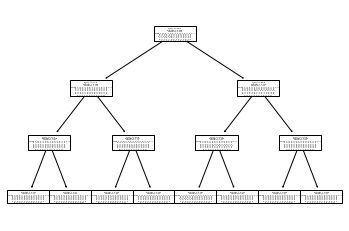

In [52]:
tree.plot_tree(model);

In [54]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

100    13
60     11
32     11
69     10
117     9
84      9
42      9
44      8
dtype: int64

In [55]:
preds

array([ 84,  69,  60, 100,  44,  42, 100,  69,  84,  60,  60,  32, 117,
        69,  44,  44, 100,  84, 117,  32,  60,  69,  84, 100,  42,  32,
       117,  60,  60,  84, 117,  32,  42, 100, 117,  84,  44,  42,  60,
       100,  60,  84,  32, 100,  32,  44, 100, 117,  42, 117,  42,  44,
        60,  32,  69,  32, 117,  69,  42,  44,  42,  44,  69,  84, 100,
        69, 100,  69,  60,  32,  69, 100, 117,  84,  42,  32,  60,  32,
       100, 100], dtype=int64)

In [56]:
pd.crosstab(y_test,preds)

col_0,32,42,44,60,69,84,100,117
Income,,,,,,,,
21,1,0,0,0,0,0,0,0
22,2,0,0,0,0,0,0,0
24,1,0,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0
26,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
113,0,0,0,0,0,0,0,1
115,0,0,0,0,0,0,0,2
118,0,0,0,0,0,0,0,1


In [57]:
np.mean(preds == y_test)

0.075

In [22]:
Fraud = pd.read_csv('I:\Assigment - Data Science\Decision Tree/Fraud_check.csv')

In [23]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [24]:
labelencoder = preprocessing.LabelEncoder()
Fraud['Urban']=labelencoder.fit_transform(Fraud['Urban'])

In [25]:
labelencoder = preprocessing.LabelEncoder()
Fraud['Undergrad']= labelencoder.fit_transform(Fraud['Undergrad'])

In [26]:
labelencoder = preprocessing.LabelEncoder()
Fraud['Marital.Status'] = labelencoder.fit_transform(Fraud['Marital.Status'])

In [27]:
x = Fraud.iloc[:,0:6]
y = Fraud['Urban']

In [28]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [29]:
y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [30]:
Fraud['Urban'].unique()

array([1, 0])

In [31]:
Fraud.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state = 40)

In [33]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

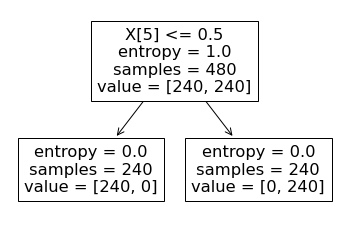

In [34]:
tree.plot_tree(model);

In [35]:
preds= model.predict(x_test)
pd.Series(preds).value_counts()

1    62
0    58
dtype: int64

In [36]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [37]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban,,
0,58,0
1,0,62


In [38]:
np.mean(preds==y_test)

1.0